# Damian Lillard Performance Analysis


As a fan of the Portland Trailblazers, I want to know against what types of teams Damian Lillard performs better. Since he extended his contract recently, it makes sense to determine in what areas he thrives and, most importantly, when he struggles to score and create for others. 

Hence the research question in thie Notebook is the following: 

**Against what types of teams does Damian Lillard, a multiple NBA all-star player, perform better ?**

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [2]:
cluster_data = pd.read_csv('data/cluster_data.csv')
players = pd.read_csv('data/2012-18_playerBoxScore.csv')
players.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1,0,1,CLE,East,Central,Home,Win,0


In [3]:
for idx, c in enumerate(players.columns): 
    print('Column {}: {}'.format(idx, c))

Column 0: gmDate
Column 1: gmTime
Column 2: seasTyp
Column 3: playLNm
Column 4: playFNm
Column 5: teamAbbr
Column 6: teamConf
Column 7: teamDiv
Column 8: teamLoc
Column 9: teamRslt
Column 10: teamDayOff
Column 11: offLNm1
Column 12: offFNm1
Column 13: offLNm2
Column 14: offFNm2
Column 15: offLNm3
Column 16: offFNm3
Column 17: playDispNm
Column 18: playStat
Column 19: playMin
Column 20: playPos
Column 21: playHeight
Column 22: playWeight
Column 23: playBDate
Column 24: playPTS
Column 25: playAST
Column 26: playTO
Column 27: playSTL
Column 28: playBLK
Column 29: playPF
Column 30: playFGA
Column 31: playFGM
Column 32: playFG%
Column 33: play2PA
Column 34: play2PM
Column 35: play2P%
Column 36: play3PA
Column 37: play3PM
Column 38: play3P%
Column 39: playFTA
Column 40: playFTM
Column 41: playFT%
Column 42: playORB
Column 43: playDRB
Column 44: playTRB
Column 45: opptAbbr
Column 46: opptConf
Column 47: opptDiv
Column 48: opptLoc
Column 49: opptRslt
Column 50: opptDayOff


## Clean the dataset

In [4]:
dame = players[players['playDispNm'] == 'Damian Lillard']
dame[['playDispNm', 'gmDate', 'opptAbbr', 'playPTS']].head()

,playDispNm,gmDate,opptAbbr,playPTS
242,Damian Lillard,2012-10-31,LAL,23
444,Damian Lillard,2012-11-02,OKC,21
636,Damian Lillard,2012-11-03,HOU,20
976,Damian Lillard,2012-11-05,DAL,13
1417,Damian Lillard,2012-11-08,LAC,16


In [5]:
print('Does any column contain any null values ? \n>', dame.isnull().any().any())

Does any column contain any null values ? 
> False


In [6]:
dame.head()
dame.shape

(469, 51)

#### Add the cluster data

In [7]:
dame = pd.merge(dame, cluster_data, how='left', on=['gmDate', 'opptAbbr'])
dame.shape

(469, 52)

#### Add the season numbers

Dates are publicly available on the respective wikipedia pages. 

In [8]:
# Store the dates
end_season1 = '2013-06-20'
end_season2 = '2014-06-15'
end_season3 = '2015-06-16'
end_season4 = '2016-06-29'
end_season5 = '2017-06-12'
end_season6 = '2018-06-08'

season = []
for ele in dame['gmDate']: 
    if ele < end_season1:
        season.append(1)
    elif ele <= end_season2: 
        season.append(2)
    elif ele <= end_season3: 
        season.append(3)
    elif ele <= end_season4: 
        season.append(4)
    elif ele <= end_season5: 
        season.append(5)
    elif ele <= end_season6: 
        season.append(6)

dame['seasonNmbr'] = season

#### Add 0-1 for Win-Loss

In [9]:
dame['win'] = dame['teamRslt'].apply(lambda x: 1 if x == 'Win' else 0)

#### Isolate some features to measure performance

I try to take features that measure both offensive and defensive performance. 

In [62]:
features = [
    # 'gmDate', 'opptAbbr',
    'playMin', 'playPTS', 'playAST', 'playTO', 'play2P%', 'play3P%', 'win'
    # 'seasonNmbr', 'cluster'
]

## Overall Statistics over 2012-2018

In [63]:
dame[features].mean()

playMin    36.390192
playPTS    23.121535
playAST     6.232409
playTO      2.773987
play2P%     0.471252
play3P%     0.352704
win         0.554371
dtype: float64

In [64]:
temp_features = features
temp_features.append('seasonNmbr')
summary_season = dame[temp_features].groupby('seasonNmbr').mean()
summary_season

,playMin,playPTS,playAST,playTO,play2P%,play3P%,win
seasonNmbr,,,,,,,
1,38.621951,19.073171,6.475610,2.963415,0.460826,0.355294,0.402439
2,35.792683,20.670732,5.548780,2.353659,0.439130,0.377826,0.658537
3,35.707317,20.975610,6.170732,2.707317,0.499885,0.328322,0.621951
4,35.640000,25.053333,6.826667,3.226667,0.446399,0.351788,0.533333
5,35.893333,26.986667,5.840000,2.613333,0.491193,0.359612,0.506667
6,36.602740,26.876712,6.589041,2.808219,0.491929,0.342807,0.602740


#### Scale the data for visualisation purpose

In [65]:
scaler = StandardScaler()
scaled_dame = scaler.fit_transform(dame[features])
scaled_dame = pd.DataFrame(scaled_dame, columns=features)
scaled_dame['cluster'] = dame['cluster']
scaled_dame['seasonNmbr'] = dame['seasonNmbr']
scaled_dame

,playMin,playPTS,playAST,playTO,play2P%,play3P%,win,seasonNmbr,cluster
0,-0.342705,-0.014562,1.850330,1.876568,-0.058627,-0.540157,0.896575,1,1
1,0.396844,-0.254192,0.297906,-0.450227,0.404278,-0.102052,-1.115356,1,2
2,1.382908,-0.374007,1.074118,0.131471,0.507079,0.774684,0.896575,1,2
3,-0.835737,-1.212712,-0.478305,-1.031926,-1.630700,-1.197578,-1.115356,1,2
4,1.136392,-0.853267,-0.866411,0.131471,-0.161428,0.774684,-1.115356,1,1
...,...,...,...,...,...,...,...,...,...
464,-0.835737,0.464698,1.074118,-1.613625,1.461145,-0.540157,0.896575,6,2
465,-0.342705,0.704329,0.686012,-1.613625,-0.428350,-0.803125,-1.115356,6,0
466,-0.342705,1.183589,-0.478305,2.458266,0.172826,0.774684,-1.115356,6,1
467,0.889876,0.225068,-1.254517,0.131471,0.172826,-0.803125,-1.115356,6,2


#### Check if clusters well spread

In [66]:
dame.groupby('cluster')['win'].count()

cluster
0     91
1    186
2    192
Name: win, dtype: int64

## Performance Analysis

In this section I analyse the features for each cluster an interpret the results. 

In [104]:
summary_cluster = scaled_dame.groupby('cluster').mean()
summary_cluster

,playMin,playPTS,playAST,playTO,play2P%,play3P%,win,seasonNmbr
cluster,,,,,,,,
0,-0.107024,0.247451,0.054807,0.169825,0.022499,-0.131545,-0.186773,4.307692
1,0.000562,0.122002,0.062122,-0.078065,0.014591,0.214310,-0.131024,3.295699
2,0.050180,-0.235471,-0.086157,-0.004864,-0.024798,-0.145266,0.215452,3.125000


Text(0, 0.5, 'Values')

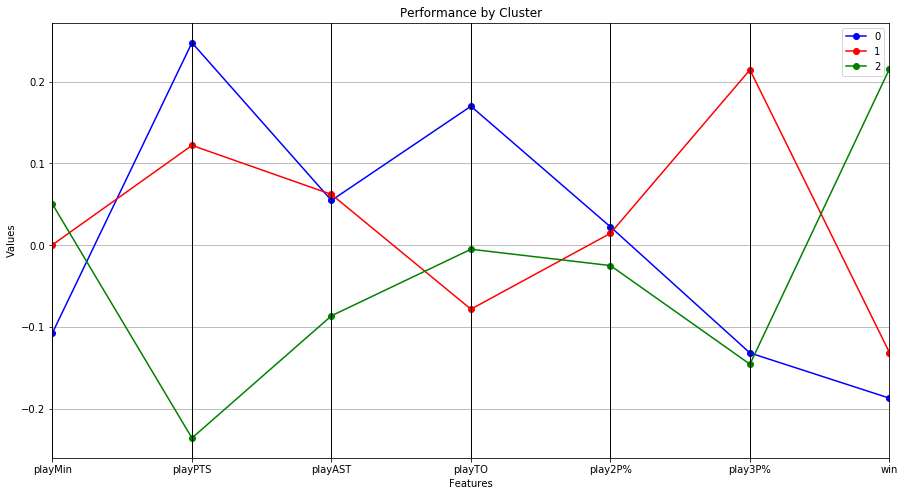

In [105]:
plt.figure(figsize=(15,8)).gca()
parallel_coordinates(
    summary_cluster.reset_index().iloc[:, :len(features)], 
    'cluster', 
    color=('b', 'r', 'g', 'c', 'm', 'y', 'k', 'g'), 
    marker='o'
)
plt.title('Performance by Cluster')
plt.xlabel('Features')
plt.ylabel('Values')

Text(23.41459635416667, 0.5, 'Points per game')

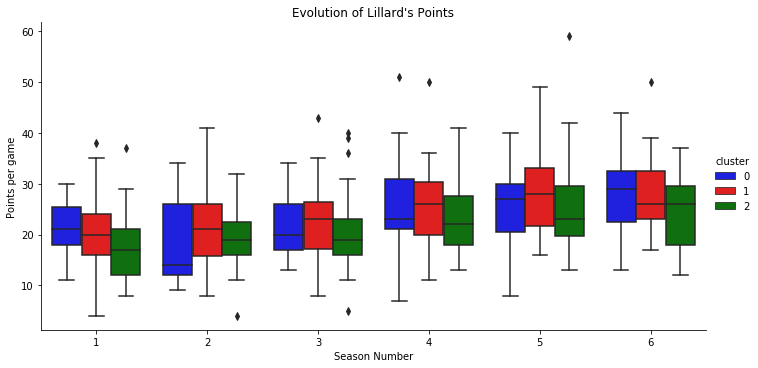

In [100]:
sns.catplot(
    x='seasonNmbr', 
    y='playPTS', 
    hue='cluster', 
    data=dame[['cluster', 'seasonNmbr', 'playPTS']],
    kind='box',
    palette=('b', 'r', 'g'),
    aspect=2
)
plt.title('Evolution of Lillard\'s Points')
plt.xlabel('Season Number')
plt.ylabel('Points per game')

Text(23.605872395833345, 0.5, '3P% per game')

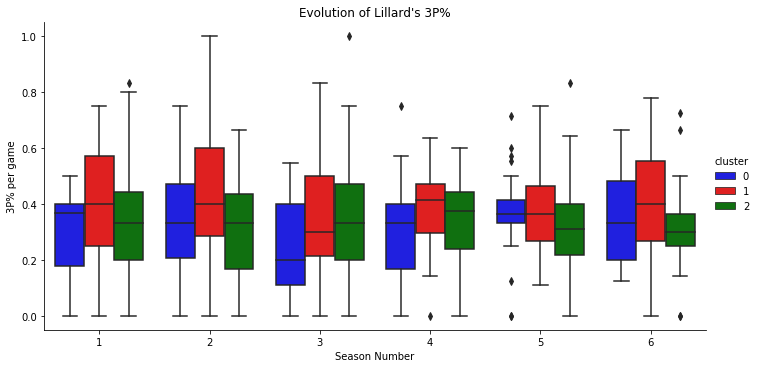

In [99]:
sns.catplot(
    x='seasonNmbr', 
    y='play3P%', 
    hue='cluster', 
    data=dame[['cluster', 'seasonNmbr', 'play3P%']],
    kind='box',
    palette=('b', 'r', 'g'),
    aspect=2
)
plt.title('Evolution of Lillard\'s 3P%')
plt.xlabel('Season Number')
plt.ylabel('3P% per game')

## Damian Lillard evolution 

I study the best and worst clusters to see whether he has improved depending on the opponents' style of play. 

### By Cluster

In [17]:
# Cluster 0
dame[dame['cluster'] == 0].groupby('seasonNmbr')[features].mean()

,playPTS,playAST,playTO,win,seasonNmbr
seasonNmbr,,,,,
1,21.166667,8.000000,3.666667,0.333333,1.0
2,19.000000,5.571429,1.857143,0.857143,2.0
3,21.555556,6.222222,4.000000,0.222222,3.0
4,25.782609,6.652174,3.478261,0.521739,4.0
5,25.869565,5.608696,2.869565,0.347826,5.0
6,28.260870,6.739130,2.695652,0.521739,6.0


In [18]:
# Cluster 1
dame[dame['cluster'] == 1].groupby('seasonNmbr')[features].mean()

,playPTS,playAST,playTO,win,seasonNmbr
seasonNmbr,,,,,
1,20.636364,6.484848,3.000000,0.363636,1.0
2,21.975000,5.875000,2.325000,0.600000,2.0
3,22.000000,6.461538,2.153846,0.461538,3.0
4,25.593750,6.531250,2.937500,0.468750,4.0
5,27.861111,6.583333,2.583333,0.555556,5.0
6,28.210526,6.631579,2.947368,0.421053,6.0


In [19]:
# Cluster 2
dame[dame['cluster'] == 2].groupby('seasonNmbr')[features].mean()

,playPTS,playAST,playTO,win,seasonNmbr
seasonNmbr,,,,,
1,17.581395,6.255814,2.837209,0.441860,1.0
2,19.514286,5.171429,2.485714,0.685714,2.0
3,20.297872,6.000000,2.765957,0.787234,3.0
4,23.350000,7.500000,3.400000,0.650000,4.0
5,26.625000,4.500000,2.312500,0.625000,5.0
6,25.032258,6.451613,2.806452,0.774194,6.0


In [22]:
# Comparison with his season averages
import numpy as np
test = np.array(dame[dame['cluster'] == 0].groupby('seasonNmbr')[features].mean().iloc[:, :4])
pd.DataFrame(test - np.array(summary_season), columns=features[:4])

,playPTS,playAST,playTO,win
0,2.093496,1.524390,0.703252,-0.069106
1,-1.670732,0.022648,-0.496516,0.198606
2,0.579946,0.051491,1.292683,-0.399729
3,0.729275,-0.174493,0.251594,-0.011594
4,-1.117101,-0.231304,0.256232,-0.158841
5,1.384157,0.150089,-0.112567,-0.081001


In [74]:
# Comparison with his season averages
import numpy as np
test = dame[dame['cluster'] == 2].groupby('seasonNmbr')[features].mean()
100*(test - summary_season)/summary_season

,play2P%,play3P%,playAST,playMin,playPTS,playTO,seasonNmbr,win
seasonNmbr,,,,,,,,
1,-2.123091,-6.509107,-3.394210,-0.707147,-7.821329,-4.258781,NaN,9.795631
2,4.049775,-18.236655,-6.800628,1.696763,-5.594606,5.610659,NaN,4.126984
3,-3.087994,2.352830,-2.766798,-0.669980,-3.231074,2.165996,NaN,26.574885
4,7.477920,-7.778264,9.863281,0.729517,-6.798829,5.371901,NaN,21.875000
5,-12.040744,-7.309823,-22.945205,1.341939,-1.340168,-11.511480,NaN,23.355263
6,-1.479966,-8.679884,-2.085709,0.115897,-6.862648,-0.062943,NaN,28.445748
